In [51]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_style("darkgrid")

def rm_outliers(df):
    return df[df - df.mean() <= 3*df.std()]

def plot_stuff(f, name):
    data = pd.read_csv(f)
    eg = rm_outliers(data['eg'])
    ch = rm_outliers(data['ch'])
    
    describe = {'eg': eg.describe(), 'ch': ch.describe()}
    print name
    print '---'
    print describe['eg']
    print '---'
    print describe['ch']
    
    sns.distplot(eg, hist=False, kde_kws={'label': 'eg'})
    sns.distplot(ch, hist=False, kde_kws={'label': 'ch'})
    
    lower = min([describe[x]['mean'] - 3*describe[x]['std'] for x in ('eg', 'ch')])
    upper = max([describe[x]['mean'] + 3*describe[x]['std'] for x in ('eg', 'ch')])
    plt.xlabel('nanosegundos')
    plt.xlim(lower, upper)
    
    plt.savefig('imagenes/{}.png'.format(name), format='png', bbox_inches = 'tight', dpi = 200)
    plt.show()

## ATP y NBA distribution

## Comparar a varios tamaños de N:M

## misma C, b cambia

## generador mismo match count??

## Cholesky vs EG
En un sistema con 1000 partidos, el método mas eficaz depende de la cantidad de equipos que juegan.

nba
---
count      987.000000
mean     29571.159068
std       7353.254558
min      11862.000000
25%      26615.000000
50%      27137.000000
75%      32898.500000
max      59032.000000
Name: eg, dtype: float64
---
count       995.000000
mean      40935.722613
std       14886.518463
min       16548.000000
25%       32350.000000
50%       38299.000000
75%       46302.000000
max      153012.000000
Name: ch, dtype: float64


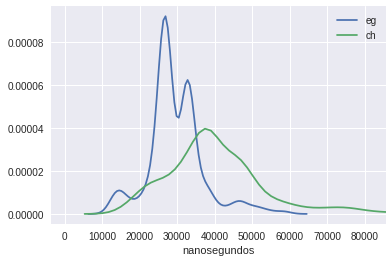

atp
---
count    9.780000e+02
mean     2.096023e+07
std      3.614481e+06
min      1.768347e+07
25%      1.871845e+07
50%      1.971577e+07
75%      2.144086e+07
max      3.952288e+07
Name: eg, dtype: float64
---
count    9.800000e+02
mean     1.452178e+07
std      1.248011e+06
min      1.291725e+07
25%      1.363160e+07
50%      1.412143e+07
75%      1.494426e+07
max      2.078657e+07
Name: ch, dtype: float64


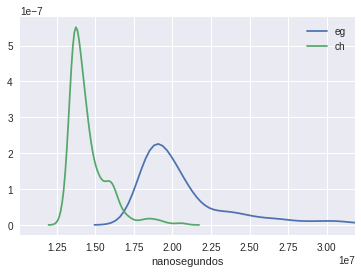

20 equipos
---
count    996.000000
mean      14.428715
std        4.433080
min        6.000000
25%       13.000000
50%       13.000000
75%       14.000000
max       37.000000
Name: eg, dtype: float64
---
count    982.000000
mean      18.977597
std        4.102348
min       12.000000
25%       17.000000
50%       18.000000
75%       18.000000
max       36.000000
Name: ch, dtype: float64


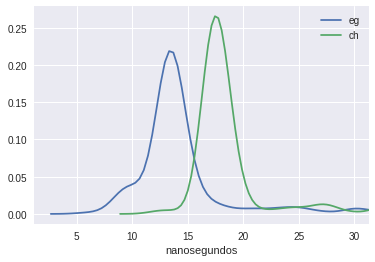

200 equipos
---
count      99.000000
mean     3325.141414
std       790.177596
min      1884.000000
25%      3296.000000
50%      3384.000000
75%      3501.500000
max      9036.000000
Name: eg, dtype: float64
---
count      98.000000
mean     2907.122449
std       207.760532
min      2701.000000
25%      2754.000000
50%      2814.500000
75%      3038.500000
max      3477.000000
Name: ch, dtype: float64


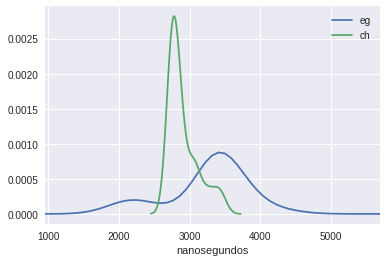

500 equipos
---
count    1.952000e+03
mean     4.609084e+07
std      3.561252e+06
min      4.293642e+07
25%      4.386331e+07
50%      4.469436e+07
75%      4.665548e+07
max      6.112636e+07
Name: eg, dtype: float64
---
count    1.948000e+03
mean     2.855338e+07
std      1.258113e+06
min      2.658878e+07
25%      2.766130e+07
50%      2.817941e+07
75%      2.894839e+07
max      3.368542e+07
Name: ch, dtype: float64


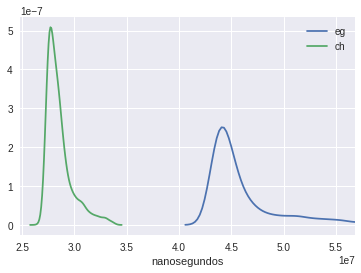

In [54]:
plot_stuff('csv/nba.csv', 'nba')
plot_stuff('csv/atp.csv', 'atp')

plot_stuff('csv/20_1000.csv', '20 equipos')
plot_stuff('csv/200_1000.csv', '200 equipos')
plot_stuff('csv/500_1000.csv', '500 equipos')

games     50        500       2000      5000      10000     50000
teams                                                            
1000   1.705422  1.620689  1.755896  1.697079  1.730503  1.629881
500    1.720935  1.538390  1.380071  1.327093  1.232535  1.327463
50     1.189612  0.944492  1.037066  1.106040  1.008733  1.012334
10     0.411160  0.385796  0.366959  0.380056  0.397161  0.388884


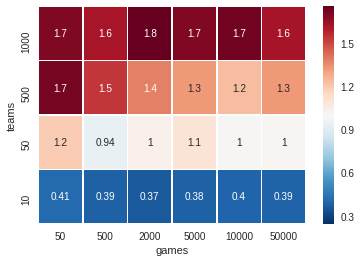

In [46]:
d={'games':[],'teams':[], 'ratio':[]}
for t in [10,50,500,1000]:
    for g in [50,500,2000,5000,10000,50000]:
        data = pd.read_csv('csv/{}_{}.csv'.format(t,g))
        eg = data['eg']
        ch = data['ch']
        d['games'].append(g)
        d['teams'].append(t)
        d['ratio'].append(eg.mean()/ch.mean())

df = pd.DataFrame(d)
df = df.pivot('teams', 'games', 'ratio')[::-1]
print df
sns.heatmap(df, annot=True, linewidths=.5, center=1)
plt.savefig('imagenes/heatmap.png', format='png', bbox_inches = 'tight', dpi = 200)
plt.show()

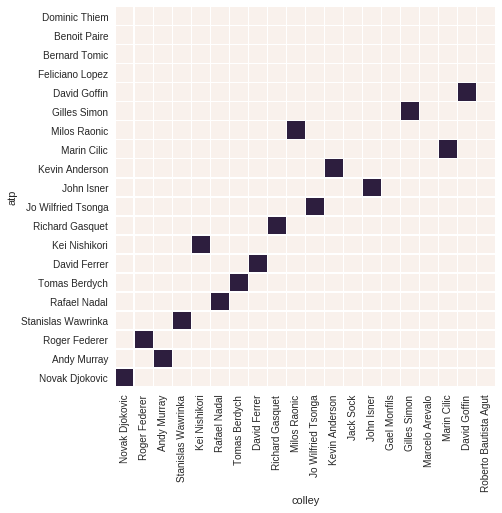

In [47]:
colley = ['Novak Djokovic',
 'Roger Federer',
 'Andy Murray',
 'Stanislas Wawrinka',
 'Kei Nishikori',
 'Rafael Nadal',
 'Tomas Berdych',
 'David Ferrer',
 'Richard Gasquet',
 'Milos Raonic',
 'Jo Wilfried Tsonga',
 'Kevin Anderson',
 'Jack Sock',
 'John Isner',
 'Gael Monfils',
 'Gilles Simon',
 'Marcelo Arevalo',
 'Marin Cilic',
 'David Goffin',
 'Roberto Bautista Agut']
atp = ['Novak Djokovic',
 'Andy Murray',
 'Roger Federer',
 'Stanislas Wawrinka',
 'Rafael Nadal',
 'Tomas Berdych',
 'David Ferrer',
 'Kei Nishikori',
 'Richard Gasquet',
 'Jo Wilfried Tsonga',
 'John Isner',
 'Kevin Anderson',
 'Marin Cilic',
 'Milos Raonic',
 'Gilles Simon',
 'David Goffin',
 'Feliciano Lopez',
 'Bernard Tomic',
 'Benoit Paire',
 'Dominic Thiem']

d = {'atp':[],'colley':[],'x':[]} 

for t1 in atp:        
    for t2 in colley:
        d["atp"].append(t1)
        d["colley"].append(t2)
        d["x"].append(1 if t1==t2 else 0)

df = pd.DataFrame(d)
df = df.pivot('atp', 'colley', 'x').reindex_axis(reversed(atp), axis=0).reindex_axis(colley, axis=1)

plt.figure(figsize=(7, 7))
sns.heatmap(df, cbar=False, linewidths=0.5, square=True)
plt.savefig('imagenes/ranking.png', format='png', bbox_inches = 'tight', dpi = 200)